# Link 
https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data

# The imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loading the dataframe

In [2]:
data = pd.read_csv('Breast_Cancer.csv')

# Consulting the dataframe

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
# Assuming you have a DataFrame named 'df'
columns_with_nulls = data.columns[data.isnull().any()]

# Print the columns with null values
print(columns_with_nulls)

Index([], dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# Training the model

In [6]:
# Separate features and target
X = data.drop('Status', axis=1)
y = data['Status']
# Define features
numeric_features = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
categorical_features = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']
# Function to get unique values for categorical features
def get_unique_values(df, categorical_features):
    unique_values = {}
    for feature in categorical_features:
        unique_values[feature] = df[feature].unique().tolist()
    return unique_values
# Save unique values
unique_values = get_unique_values(data, categorical_features)
with open('unique_values.json', 'w') as f:
    json.dump(unique_values, f)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Print the model's accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9118012422360249

Classification Report:
              precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       685
        Dead       0.84      0.51      0.63       120

    accuracy                           0.91       805
   macro avg       0.88      0.75      0.79       805
weighted avg       0.91      0.91      0.90       805



# Saving the model

In [7]:
joblib.dump(model, 'breast_cancer_model.joblib')
print("Model saved as 'breast_cancer_model.joblib'")
print("Unique values saved as 'unique_values.json'")

Model saved as 'breast_cancer_model.joblib'
Unique values saved as 'unique_values.json'


# Confusion matrix

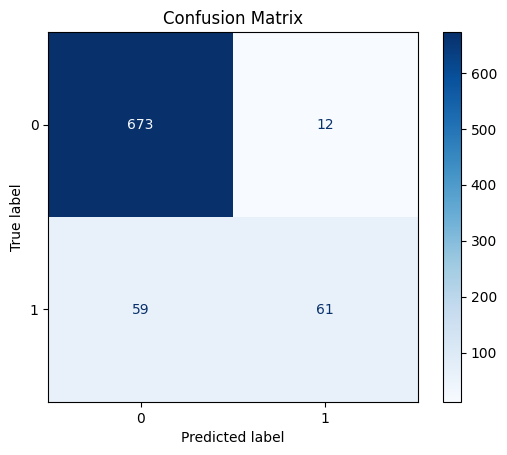

In [32]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title('Confusion Matrix')
plt.show()
